# **Problem 1: Exploring Color Spaces and Image Transformations**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A.

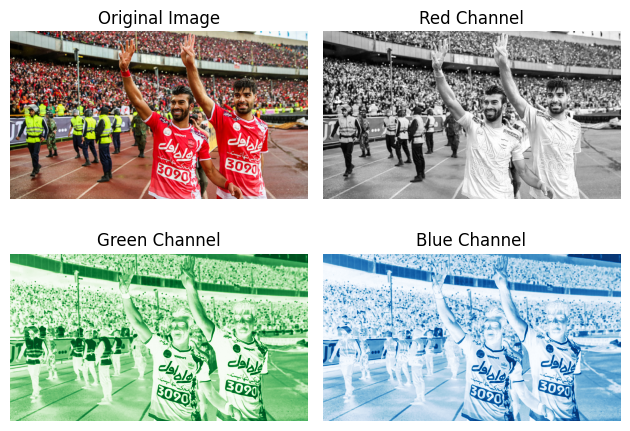

In [ ]:
image = cv2.imread('Q1.jpg')

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_red = image[:, :, 0]
image_green = image[:, :, 1]
image_blue = image[:, :, 2]

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display the red channel
plt.subplot(2, 2, 2)
plt.imshow(image_red, cmap = 'Reds')
plt.title('Red Channel')
plt.axis('off')

# Display the green channel
plt.subplot(2, 2, 3)
plt.imshow(image_green, cmap = 'Greens')
plt.title('Green Channel')
plt.axis('off')

# Display the blue channel
plt.subplot(2, 2, 4)
plt.imshow(image_blue, cmap = 'Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

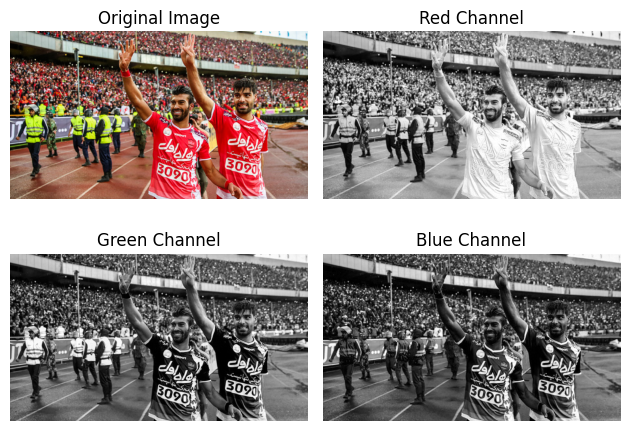

In [6]:
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display the red channel
plt.subplot(2, 2, 2)
plt.imshow(image_red, cmap = 'gray')
plt.title('Red Channel')
plt.axis('off')

# Display the green channel
plt.subplot(2, 2, 3)
plt.imshow(image_green, cmap = 'gray')
plt.title('Green Channel')
plt.axis('off')

# Display the blue channel
plt.subplot(2, 2, 4)
plt.imshow(image_blue, cmap = 'gray')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# B.

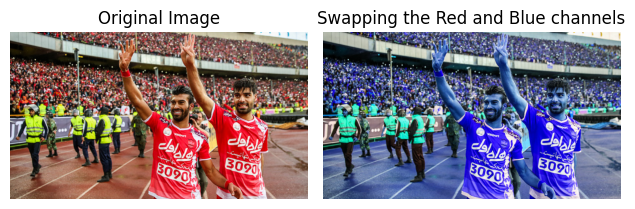

In [3]:
image_B2R = image.copy()
image_B2R[:, :, 2] = image[:, :, 0]
image_B2R[:, :, 0] = image[:, :, 2]

# Solution No. 2
# image_B2R = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_B2R)
plt.title('Swapping the Red and Blue channels')
plt.axis('off')

plt.tight_layout()
plt.show()

# C.

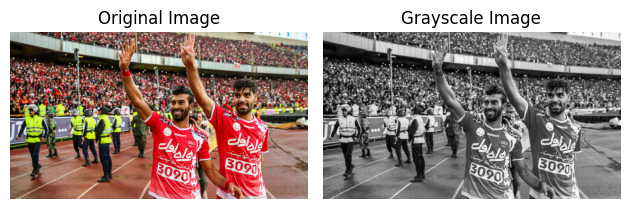

In [4]:
grayscale_image = image[:, :, 0]*0.299 + image[:, :, 1]*0.587 + image[:, :, 2]*0.114

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap = 'gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# D.  

"Explanation of this part in the report."

# E.

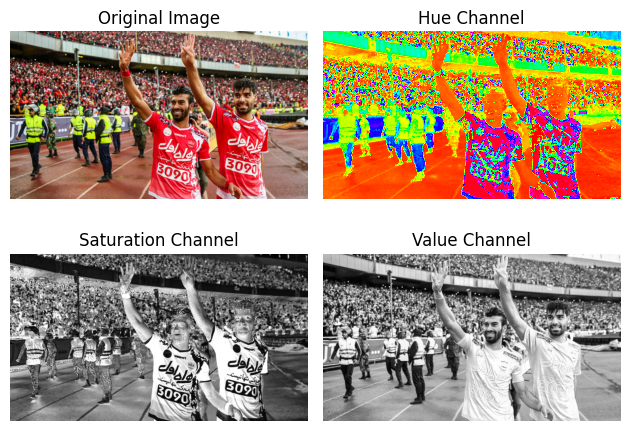

In [5]:
# Convert RGB to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

Hue = image_hsv[:, :, 0]
Saturation = image_hsv[:, :, 1]
Value = image_hsv[:, :, 2]

# Solution No. 2
# Hue, Saturation, Value = cv2.split(image_hsv)

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display the Hue channel
plt.subplot(2, 2, 2)
plt.imshow(Hue, cmap = 'hsv')
plt.title('Hue Channel')
plt.axis('off')

# Display the Saturation channel
plt.subplot(2, 2, 3)
plt.imshow(Saturation, cmap = 'gray')
plt.title('Saturation Channel')
plt.axis('off')

# Display the Value channel
plt.subplot(2, 2, 4)
plt.imshow(Value, cmap = 'gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# F.

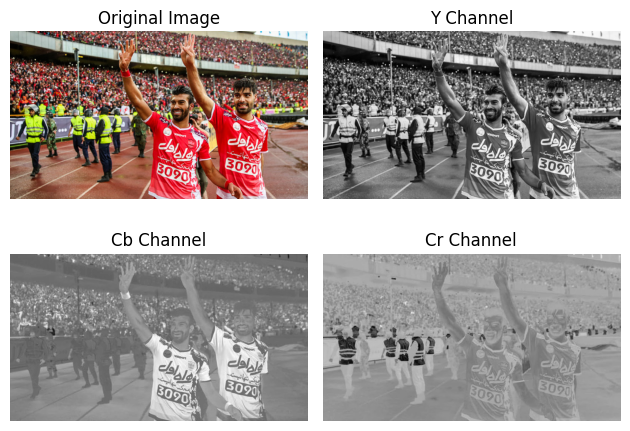

In [6]:
# Convert RGB to YCbCr
image_YCbCr = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)

Y, Cb, Cr = cv2.split(image_YCbCr)

# Solution No. 2  ;  Manual conversion from RGB to YCbCr.
# Y = 0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]
# Cb = -0.1687 * image[:, :, 0] - 0.3313 * image[:, :, 1] + 0.5 * image[:, :, 2]
# Cr = 0.5 * image[:, :, 0] - 0.4187 * image[:, :, 1] - 0.0813 * image[:, :, 2]

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Display the Y channel
plt.subplot(2, 2, 2)
plt.imshow(Y, cmap = 'gray')
plt.title('Y Channel')
plt.axis('off')

# Display the Cb channel
plt.subplot(2, 2, 3)
plt.imshow(Cb, cmap = 'gray')   # Chrominance Blue
plt.title('Cb Channel')
plt.axis('off')

# Display the Cr channel
plt.subplot(2, 2, 4)
plt.imshow(Cr, cmap = 'gray')   # Chrominance Red
plt.title('Cr Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# G.

"Explanation of this part in the report."

# H.

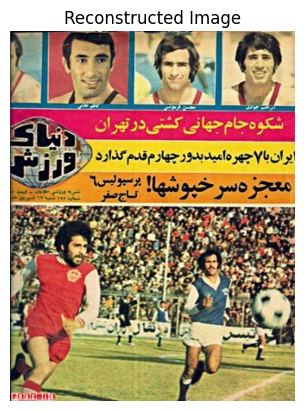

In [11]:
image_1 = cv2.imread("Q1h1.jpg", cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread("Q1h2.jpg", cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread("Q1h3.jpg", cv2.IMREAD_GRAYSCALE)

if image_1.shape != image_2.shape or image_2.shape != image_3.shape:
    raise ValueError("Dimensions do not match!")

def find_peak_intensity(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return int(np.argmax(hist))

peaks = [find_peak_intensity(image_1),
          find_peak_intensity(image_2),
          find_peak_intensity(image_3)]
means = [np.mean(image_1), np.mean(image_2), np.mean(image_3)]

# Identify the red channel based on the peak intensity
if peaks[0] > peaks[1] and peaks[0] > peaks[2]:
    red = 0
elif peaks[1] > peaks[0] and peaks[1] > peaks[2]:
    red = 1
else:
    red = 2

# Find the green and blue channels
remaining_channels = [0, 1, 2]
remaining_channels.remove(red)

if means[remaining_channels[0]] > means[remaining_channels[1]]:
    green = remaining_channels[0]
    blue = remaining_channels[1]
else:
    green = remaining_channels[1]
    blue = remaining_channels[0]

channels = [image_1, image_2, image_3]
red_channel = channels[red]
green_channel = channels[green]
blue_channel = channels[blue]

# Merge the channels to create the final RGB image
Reconstructed_image = cv2.merge([blue_channel, green_channel, red_channel])
Reconstructed_image = cv2.cvtColor(Reconstructed_image, cv2.COLOR_BGR2RGB)

plt.imshow(Reconstructed_image) 
plt.axis("off")
plt.title("Reconstructed Image")
plt.show()